In [76]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn")

# machine learning

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [10]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
# Check Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
# Check is there is na values - no
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [21]:
df.groupby(by='left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [67]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,NaN
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,NaN
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,NaN
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,NaN
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,NaN
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,NaN
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,NaN
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,NaN
salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From Above, it appears the following have high impact on employee retention:
1. satisfaction_level
2. average_montly_hours
3. promotion_last_5years
4. time_spend_company
5.Work_accident

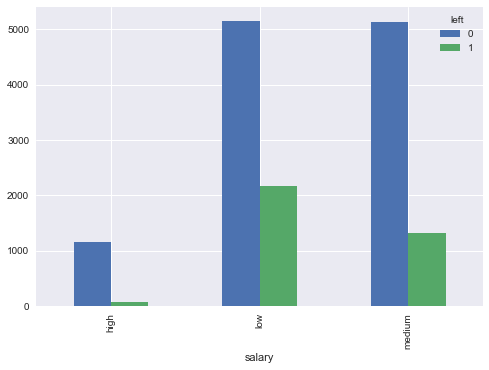

In [23]:
Impact on Salary
pd.crosstab( df.salary, df.left ).plot( kind='bar' )

Salary has a high impact - High salary leads to lower turnover

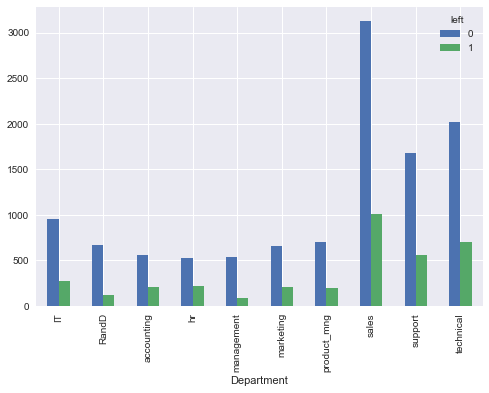

In [24]:
# department 
pd.crosstab(df.Department,df.left).plot(kind='bar')

Have some impact, but we will focus on one department at a time

In [28]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [40]:
# convert salary to numeric
df.salary=df.salary.apply(lambda x: 1 if x=='low' else (2 if x=='medium' else 3))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,3
1,0.80,0.86,5,262,6,0,1,0,sales,3
2,0.11,0.88,7,272,4,0,1,0,sales,3
3,0.72,0.87,5,223,5,0,1,0,sales,3
4,0.37,0.52,2,159,3,0,1,0,sales,3


In [68]:
# Select the fields that I need
df2=df.drop(columns=['last_evaluation','number_project','Department'])
df2

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,157,3,0,1,0,3
1,0.80,262,6,0,1,0,3
2,0.11,272,4,0,1,0,3
3,0.72,223,5,0,1,0,3
4,0.37,159,3,0,1,0,3
...,...,...,...,...,...,...,...
14994,0.40,151,3,0,1,0,3
14995,0.37,160,3,0,1,0,3
14996,0.37,143,3,0,1,0,3
14997,0.11,280,4,0,1,0,3


In [69]:
columns=['satisfaction_level','average_montly_hours','time_spend_company','promotion_last_5years','salary']
X=df2[columns]
y=df2['left']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [71]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
model.score(X_test,y_test)

0.7669333333333334

In [74]:
model.predict_proba(X_test)

array([[0.27744501, 0.72255499],
       [0.81371362, 0.18628638],
       [0.57037143, 0.42962857],
       ...,
       [0.8468351 , 0.1531649 ],
       [0.75423124, 0.24576876],
       [0.67858696, 0.32141304]])